# Observed Trends

Trend 1: Temperature at equator is the highest. Overall the south part of the earth is warmer than north part now, that's because of the season difference.

Trend 2: Cloudiness is almost the same regardless of the latitude today.

Trend 3: higher wind speed can be found from the north part of the earth today.

In [1]:
# Dependencies

from citipy import citipy
import random
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import pandas as pd
from mydata import *
from pprint import pprint

In [2]:
# define a function to generate random lat/lon pairs
def random_lat_lon_generate(number):
    lat_list = [random.randint(-90, 91) for i in range(number)]
    lng_list = [random.randint(-180, 181) for i in range(number)]
    location_list = [(lat_list[i], lng_list[i]) for i in range(number)]
    return location_list

In [3]:
# generate location list of 2,000 random lat/lon pairs
loc_list = random_lat_lon_generate(2000)

In [4]:
# define a function to convert coordinates to city, country
def convert_coord_to_city(lat, lon):
    city = citipy.nearest_city(lat, lon)
    name = city.city_name
    code = city.country_code
    return name, code

In [5]:
# convert 2,000 coordinates to city names & country codes
city_names = []
country_codes = []

for loc in loc_list:
    name, code = convert_coord_to_city(loc[0], loc[1])
    city_names.append(name)
    country_codes.append(code)

In [6]:
# generate data frame using city names and country code, drop duplicate rows
df = pd.DataFrame({
    'City Name': city_names,
    'Country Code': country_codes
})

unique_df = df.drop_duplicates()
unique_df = unique_df.reset_index(drop=True)

In [7]:
# set up additional columns to hold information
unique_df['Temperature'] = ""
unique_df['Humidity'] = ""
unique_df['Cloudiness'] = ""
unique_df['Wind Speed'] = ""
unique_df['Latitude'] = ""
unique_df['Longitude'] = ""

unique_df.head()

,City Name,Country Code,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,port alfred,za,,,,,,
1,kholmy,ua,,,,,,
2,anjar,in,,,,,,
3,mutsamudu,km,,,,,,
4,busselton,au,,,,,,


In [9]:
# find the weather information for each city
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={OpenWeather_api_key}"

# use iterrows to iterate through pandas dataframe
counter = 0
for index, row in unique_df.iterrows():
    
    # progress of the request
    print(f"Now handling city #{counter}: {row['City Name']}")
    counter += 1
    
    # assemble url and make API request
    query_url = f"{base_url}&q={row['City Name']},{row['Country Code']}"
    print(query_url)
    response = requests.get(query_url).json()
    
    # extract first result and use pd.set_value to insert into dataframe
    results = response.get('main')
    if (results):
        unique_df.set_value(index, 'Temperature', response['main']['temp'])
        unique_df.set_value(index, 'Humidity', response['main']['humidity'])
        unique_df.set_value(index, 'Cloudiness', response['clouds']['all'])
        unique_df.set_value(index, 'Wind Speed', response['wind']['speed'])
        unique_df.set_value(index, 'Latitude', response['coord']['lat'])
        unique_df.set_value(index, 'Longitude', response['coord']['lon'])
    else:
        print(f"No results for {row['City Name']}")
    print("------------------")

Now handling city #0: port alfred
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=port alfred,za
------------------
Now handling city #1: kholmy
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=kholmy,ua
------------------
Now handling city #2: anjar
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=anjar,in
------------------
Now handling city #3: mutsamudu
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=mutsamudu,km
No results for mutsamudu
------------------
Now handling city #4: busselton
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=busselton,au
------------------
Now handling city #5: albany
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=albany,au
--------------

------------------
Now handling city #49: kondinskoye
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=kondinskoye,ru
------------------
Now handling city #50: fort nelson
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=fort nelson,ca
------------------
Now handling city #51: hobyo
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=hobyo,so
------------------
Now handling city #52: hobart
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=hobart,au
------------------
Now handling city #53: taolanaro
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=taolanaro,mg
No results for taolanaro
------------------
Now handling city #54: turukhansk
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e

------------------
Now handling city #97: lavrentiya
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=lavrentiya,ru
------------------
Now handling city #98: khatanga
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=khatanga,ru
------------------
Now handling city #99: cape town
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=cape town,za
------------------
Now handling city #100: samusu
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=samusu,ws
No results for samusu
------------------
Now handling city #101: roura
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=roura,gf
------------------
Now handling city #102: georgetown
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q

------------------
Now handling city #145: mataura
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=mataura,pf
No results for mataura
------------------
Now handling city #146: aklavik
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=aklavik,ca
------------------
Now handling city #147: sitka
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=sitka,us
------------------
Now handling city #148: el terrero
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=el terrero,hn
------------------
Now handling city #149: torbay
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=torbay,ca
------------------
Now handling city #150: voghera
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=vogh

------------------
Now handling city #194: nikolskoye
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=nikolskoye,ru
------------------
Now handling city #195: dikson
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=dikson,ru
------------------
Now handling city #196: tasiilaq
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=tasiilaq,gl
------------------
Now handling city #197: plettenberg bay
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=plettenberg bay,za
------------------
Now handling city #198: fortuna
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=fortuna,us
------------------
Now handling city #199: kupang
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=kupang

No results for tsihombe
------------------
Now handling city #243: acarau
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=acarau,br
No results for acarau
------------------
Now handling city #244: zalaszentgrot
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=zalaszentgrot,hu
------------------
Now handling city #245: lewisporte
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=lewisporte,ca
------------------
Now handling city #246: shitkino
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=shitkino,ru
------------------
Now handling city #247: doha
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=doha,kw
No results for doha
------------------
Now handling city #248: alaca
https://api.openweathermap.org/data/2.5/weather?units

No results for maloshuyka
------------------
Now handling city #291: galgani
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=galgani,sd
No results for galgani
------------------
Now handling city #292: upata
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=upata,ve
------------------
Now handling city #293: hamilton
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=hamilton,bm
------------------
Now handling city #294: hihifo
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=hihifo,to
No results for hihifo
------------------
Now handling city #295: pakxan
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=pakxan,la
------------------
Now handling city #296: san quintin
https://api.openweathermap.org/data/2.5/weather?units=metric

------------------
Now handling city #340: omboue
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=omboue,ga
------------------
Now handling city #341: saint-francois
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=saint-francois,gp
------------------
Now handling city #342: jiexiu
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=jiexiu,cn
------------------
Now handling city #343: fairbanks
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=fairbanks,us
------------------
Now handling city #344: orcopampa
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=orcopampa,pe
------------------
Now handling city #345: mercedes
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=mercedes

------------------
Now handling city #388: mecca
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=mecca,sa
------------------
Now handling city #389: am timan
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=am timan,td
------------------
Now handling city #390: yenagoa
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=yenagoa,ng
------------------
Now handling city #391: koulikoro
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=koulikoro,ml
------------------
Now handling city #392: tuapse
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=tuapse,ru
------------------
Now handling city #393: prince rupert
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=prince rupert,ca
----

------------------
Now handling city #437: sakaiminato
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=sakaiminato,jp
------------------
Now handling city #438: durban
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=durban,za
------------------
Now handling city #439: bumba
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=bumba,cd
------------------
Now handling city #440: denpasar
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=denpasar,id
------------------
Now handling city #441: naze
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=naze,jp
------------------
Now handling city #442: lata
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=lata,sb
No results for lata
----

------------------
Now handling city #486: geraldton
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=geraldton,ca
------------------
Now handling city #487: barroualie
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=barroualie,vc
No results for barroualie
------------------
Now handling city #488: innisfail
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=innisfail,au
------------------
Now handling city #489: dingle
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=dingle,ie
------------------
Now handling city #490: paoua
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=paoua,cf
------------------
Now handling city #491: nuuk
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54

------------------
Now handling city #535: jiaojiang
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=jiaojiang,cn
No results for jiaojiang
------------------
Now handling city #536: karamay
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=karamay,cn
No results for karamay
------------------
Now handling city #537: tadine
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=tadine,nc
------------------
Now handling city #538: shimanovsk
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=shimanovsk,ru
------------------
Now handling city #539: matadi
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=matadi,cd
------------------
Now handling city #540: cravo norte
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6

------------------
Now handling city #584: suamico
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=suamico,us
------------------
Now handling city #585: rochegda
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=rochegda,ru
------------------
Now handling city #586: boksitogorsk
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=boksitogorsk,ru
------------------
Now handling city #587: hearst
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=hearst,ca
------------------
Now handling city #588: healdsburg
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=healdsburg,us
------------------
Now handling city #589: shache
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=shache,cn
--

------------------
Now handling city #633: westport
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=westport,ie
------------------
Now handling city #634: ruteng
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=ruteng,id
------------------
Now handling city #635: anjozorobe
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=anjozorobe,mg
------------------
Now handling city #636: qasigiannguit
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=qasigiannguit,gl
------------------
Now handling city #637: shestakovo
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=shestakovo,ru
------------------
Now handling city #638: bereda
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=bere

No results for primore
------------------
Now handling city #682: codajas
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=codajas,br
------------------
Now handling city #683: brcko
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=brcko,ba
------------------
Now handling city #684: dunda
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=dunda,tz
------------------
Now handling city #685: mujiayingzi
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=mujiayingzi,cn
------------------
Now handling city #686: yanan
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=yanan,cn
No results for yanan
------------------
Now handling city #687: marsh harbour
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a53

------------------
Now handling city #731: pundaguitan
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=pundaguitan,ph
------------------
Now handling city #732: labrea
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=labrea,br
No results for labrea
------------------
Now handling city #733: scottsburgh
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=scottsburgh,za
No results for scottsburgh
------------------
Now handling city #734: navrongo
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=navrongo,gh
------------------
Now handling city #735: khandyga
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=93c6b392174c7a538700dd943e4eb54d&q=khandyga,ru
------------------
Now handling city #736: sawakin
https://api.openweathermap.org/data/2.5/weather?units=metric&a

In [10]:
# check the finished data frame
unique_df.head()

,City Name,Country Code,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,port alfred,za,21.74,94,24,3.37,-33.59,26.89
1,kholmy,ua,-4.74,89,92,5.27,51.87,32.6
2,anjar,in,21.79,25,0,3.92,23.11,70.03
3,mutsamudu,km,,,,,,
4,busselton,au,22.52,92,8,3.17,-33.64,115.35


In [19]:
# Delete rows can't find data, rename columns and write csv file
new_df = unique_df[unique_df['Temperature'] != ""]
new_df = new_df.reset_index(drop=True)
new_df = new_df.rename(columns={'Temperature': 'Temperature(C)',
                                'Humidity': 'Humidity(%)',
                                'Cloudiness': 'Cloudiness(%)',
                                'Wind Speed': 'Wind Speed(mph)'
                               })
new_df.to_csv('WorldcityWeather.csv')

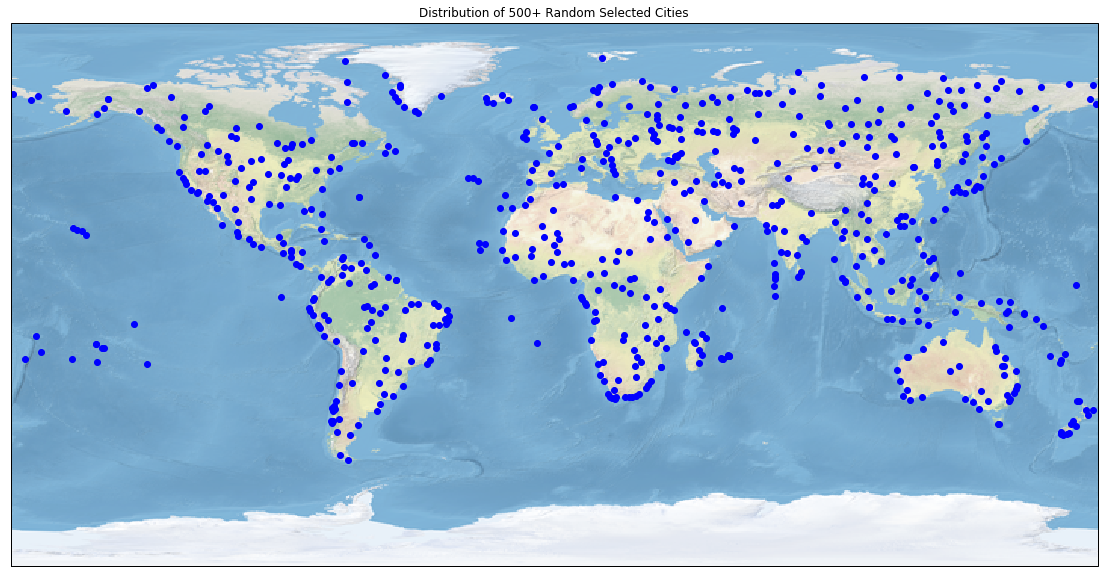

In [30]:
# visulization distribution of the cities (671)
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(20, 10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# figure(figsize=(9.4248, 3))

plt.scatter(list(new_df['Longitude']), 
            list(new_df['Latitude']),
         color='blue', marker='o',
         transform=ccrs.Geodetic(),
         )

plt.title("Distribution of 500+ Random Selected Cities")

plt.savefig('RandomCitiesOnworldmap.png')

plt.show()

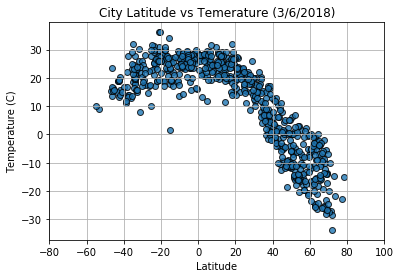

In [35]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitude"], 
            new_df["Temperature(C)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Temerature (3/6/2018)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])

# Save the figure
plt.savefig("Temp_Lat.png")

# Show plot
plt.show()

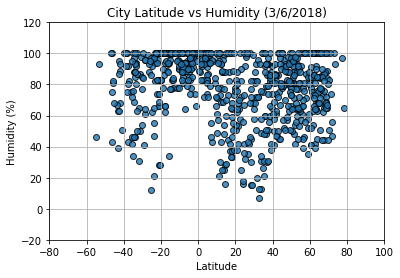

In [36]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitude"], 
            new_df["Humidity(%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (3/6/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Humidity_Lat.png")

# Show plot
plt.show()

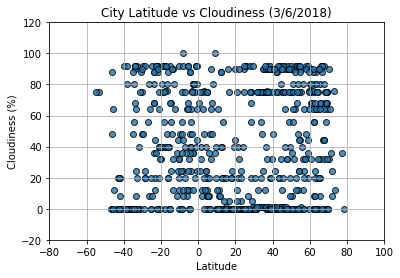

In [38]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitude"], 
            new_df["Cloudiness(%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (3/6/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Cloudiness_Lat.png")

# Show plot
plt.show()

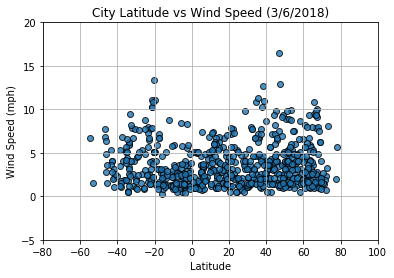

In [40]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitude"], 
            new_df["Wind Speed(mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (3/6/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 20])

# Save the figure
plt.savefig("WindSpeed_Lat.png")

# Show plot
plt.show()